In [5]:
!pip install sklearn

  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2375 sha256=a6b6ed2ff3f27d5b9f3b826cab847d7483476a168345fba049a9e652032ed30e
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\3b\1f\cd\e6505747b74c9bccdec4a1d8a768960cbd49d5ba8c88a58652
Successfully built sklearn


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Loading Data

In [7]:
tags = pd.read_csv('tags.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')

In [8]:
dataset = pd.merge(pd.merge(pd.merge(ratings, tags, on=['userId', 'movieId'], how='left'), movies, on='movieId', how='left'), links, on='movieId', how='left')

In [9]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   tag          3476 non-null    object 
 5   timestamp_y  3476 non-null    float64
 6   title        102677 non-null  object 
 7   genres       102677 non-null  object 
 8   imdbId       102677 non-null  int64  
 9   tmdbId       102664 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 8.6+ MB


In [14]:
dataset.isnull().sum()

userId             0
movieId            0
rating             0
timestamp_x        0
tag            99201
timestamp_y    99201
title              0
genres             0
imdbId             0
tmdbId            13
dtype: int64

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

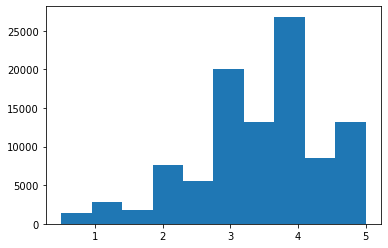

In [15]:
plt.hist(ratings['rating'], bins=10)

no null values were detected

## Train Test Validation

In [16]:
X_train, X_test = train_test_split(dataset, test_size=0.2)

In [17]:
X_train.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres,imdbId,tmdbId
60876,390,62644,4.0,1250337441,NaN,NaN,"Wave, The (Welle, Die) (2008)",Drama,1063669,7735.0
32230,219,4701,2.5,1194681445,NaN,NaN,Rush Hour 2 (2001),Action|Comedy,266915,5175.0
88263,561,122900,3.5,1491091319,NaN,NaN,Ant-Man (2015),Action|Adventure|Sci-Fi,478970,102899.0
69776,448,2986,3.0,1019132552,NaN,NaN,RoboCop 2 (1990),Action|Crime|Sci-Fi|Thriller,100502,5549.0
76687,477,3275,4.5,1216608885,NaN,NaN,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller,144117,8374.0


In [18]:
print('number of unique users: {}'.format(dataset['userId'].nunique()), 
      'number of unique movies: {}'.format(dataset['title'].nunique()))
print('total arrays in rate matrix: {}'.format(dataset['userId'].nunique() * dataset['title'].nunique()))
print('fraction of filled arrays: {}'.format(dataset['rating'].nunique()/(dataset['userId'].nunique() * dataset['title'].nunique())))

number of unique users: 610 number of unique movies: 9719
total arrays in rate matrix: 5928590
fraction of filled arrays: 1.6867417041826135e-06


In [19]:
rate_mat = dataset.pivot_table(index = 'userId', columns='title', values='rating')
rate_mat.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
corr_matrix = rate_mat.T.corr(method='pearson')

In [21]:
corr_matrix.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,0.0,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562


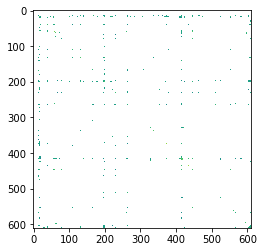

In [22]:
plt.imshow(pd.DataFrame.to_numpy(corr_matrix));

In [23]:
recom_dict = {}

threshold = (corr_matrix > 0.6)
row_index, column_index = np.where(threshold)
repeat = []
for i, j in zip(row_index, column_index):
    if (j, i) in repeat:
        continue
    if corr_matrix.iloc[i,j] == 1.:
        continue
    else:
        index = corr_matrix.index[i]
        column = corr_matrix.columns[j]
        recom_dict[(index, column)] = corr_matrix.iloc[i,j]
        repeat.append((i, j))

In [24]:
recom_dict

{(1, 9): 0.9185586535436917,
 (1, 13): 0.8783100656536798,
 (1, 44): 0.6844475644404533,
 (1, 49): 0.7500000000000001,
 (1, 65): 0.6123724356957945,
 (1, 90): 0.8215838362577492,
 (1, 114): 0.7592566023652965,
 (1, 139): 0.7905694150420949,
 (1, 154): 0.8660254037844387,
 (1, 157): 0.8017837257372733,
 (1, 162): 0.7083333333333334,
 (1, 173): 0.6172133998483676,
 (1, 207): 0.7016464154456233,
 (1, 210): 0.7676494735787386,
 (1, 248): 0.6246950475544242,
 (1, 297): 0.706281466608201,
 (1, 351): 0.6000000000000001,
 (1, 366): 0.8728715609439696,
 (1, 369): 0.6120977479108415,
 (1, 375): 0.606128125356204,
 (1, 394): 0.6506000486323554,
 (1, 401): 0.8669214468630109,
 (1, 421): 0.6412234498911868,
 (1, 430): 0.6546536707079772,
 (1, 431): 0.6030226891555273,
 (1, 435): 0.6109598099719177,
 (1, 473): 0.9622504486493763,
 (1, 476): 0.7869358789643608,
 (1, 481): 0.8660254037844387,
 (1, 487): 0.7745966692414834,
 (1, 499): 0.8029550685469662,
 (1, 505): 0.6123724356957946,
 (1, 511): 0.9258

## Content-based filtering

In [25]:
movies['profile'] = movies['genres'].str.split('|')
movies.head()

,movieId,title,genres,profile
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [26]:
# unique genres

exploded_df = movies['profile'].explode()
genres = exploded_df.unique()
genres = np.delete(genres, -1)
genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir'], dtype=object)

In [27]:
movies[movies['genres'] == '(no genres listed)'] = None
movies.dropna(inplace=True)

In [28]:
# encode_value = np.arange(len(genres))
# custom_labels = dict(zip(genres, encode_value))

# label_encoder = LabelEncoder()
# label_encoder.fit(list(custom_labels.keys()))
# label_encoder.transform(list(custom_labels.keys()))
# movies['profile'] = movies['profile'].apply(lambda x: [custom_labels[val] for val in x])



encoded_df = pd.get_dummies(movies['profile'].apply(pd.Series).stack()).max(level=0)

encoded_df.index = movies['title']
encoded_df.head(3)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(encoded_df)
	kmeanModel.fit(encoded_df)

	distortions.append(sum(np.min(cdist(encoded_df, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / encoded_df.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(encoded_df, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / encoded_df.shape[0]
	mapping2[k] = kmeanModel.inertia_


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

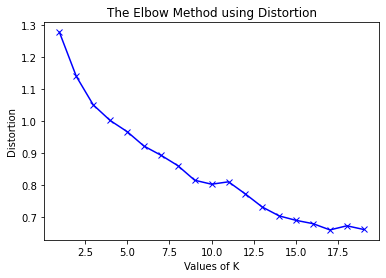

In [30]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

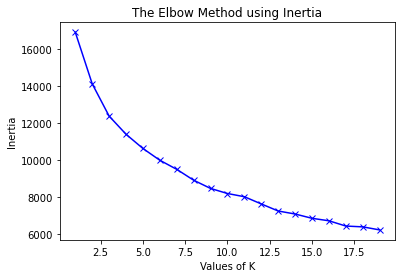

In [31]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [32]:
clean_data = dataset.drop(['timestamp_x', 'tag', 'imdbId', 'tmdbId', 'timestamp_y'], axis=1)
clean_data.head(3)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller


In [33]:
clean_data['profile'] = clean_data['genres'].str.split('|')
clean_data = clean_data.explode('profile')
clean_data.head(3)

,userId,movieId,rating,title,genres,profile
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Animation
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Children


In [34]:
user_rating = clean_data.pivot_table(index = 'userId', columns='profile', values='rating', aggfunc='mean')

user_rating.head(3)

profile,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,NaN,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,NaN,4.529412,4.297872,5.0,3.470588,NaN,4.681818,4.166667,4.307692,4.225,4.145455,4.5,4.285714
2,NaN,3.954545,4.166667,NaN,NaN,4.363636,4.000000,4.333333,4.095238,NaN,NaN,3.000000,3.75,NaN,4.000000,4.500000,3.875,3.700000,4.5,3.500000
3,NaN,3.571429,2.727273,0.500000,0.500000,1.000000,0.500000,NaN,0.750000,3.375000,NaN,4.687500,NaN,0.500000,5.000000,0.500000,4.200,4.142857,0.5,NaN


In [35]:
user_rating[user_rating<4] = 0
user_rating[user_rating>=4] = 1

user_rating.head(3)

profile,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,NaN,0.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN


In [36]:
user_rating.drop(['(no genres listed)'], axis=1, inplace=True)
user_rating.head(3)

profile,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,0.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN


In [37]:
user_rating.fillna(value=0, inplace=True)
user_rating.head(3)

profile,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [38]:
distortions_u = []
inertias_u = []
mapping1_u = {}
mapping2_u = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(user_rating)
	kmeanModel.fit(user_rating)

	distortions_u.append(sum(np.min(cdist(user_rating, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / user_rating.shape[0])
	inertias_u.append(kmeanModel.inertia_)

	mapping1_u[k] = sum(np.min(cdist(user_rating, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / user_rating.shape[0]
	mapping2_u[k] = kmeanModel.inertia_

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

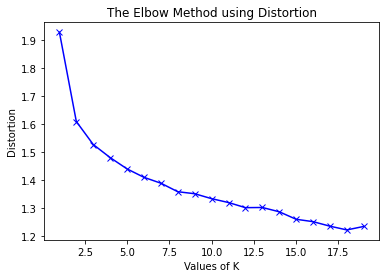

In [39]:
plt.plot(K, distortions_u, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

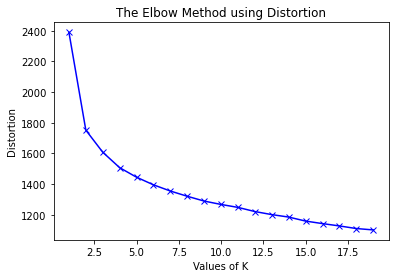

In [40]:
plt.plot(K, inertias_u, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [41]:
kmeans_movies = KMeans(n_clusters=13, random_state=0)
kmeans_movies.fit(encoded_df)
moviecluster = pd.DataFrame(kmeans_movies.labels_, index=encoded_df.index, columns=['cluster'])

moviecluster

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,cluster
title,
Toy Story (1995),2
Jumanji (1995),2
Grumpier Old Men (1995),12
Waiting to Exhale (1995),11
Father of the Bride Part II (1995),3
...,...
Black Butler: Book of the Atlantic (2017),3
No Game No Life: Zero (2017),3
Flint (2017),7


In [42]:
kmeans_users = KMeans(n_clusters=13, random_state=0)
kmeans_users.fit(user_rating)
usercluster = pd.DataFrame(kmeans_users.labels_, index=user_rating.index, columns=['cluster'])

usercluster

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,cluster
userId,
1,6
2,12
3,10
4,11
5,9
...,...
606,2
607,8
608,2


In [43]:
cluster_rating_users = {}
cluster_rating_movies = {}
for i in range(13):
    cluster_rating_users[i] = pd.DataFrame.to_numpy(user_rating[usercluster['cluster']==i].mean())
    cluster_rating_movies[i] = pd.DataFrame.to_numpy(encoded_df[moviecluster['cluster']==i].mean())

In [44]:
user_cluster_df = pd.DataFrame(cluster_rating_users, index = user_rating.columns)
movie_cluster_df = pd.DataFrame(cluster_rating_movies, index = encoded_df.columns)

In [45]:
cluster_rating_users[1]

array([0.        , 0.23333333, 0.9       , 0.76666667, 0.13333333,
       0.56666667, 0.06666667, 0.73333333, 0.63333333, 0.1       ,
       0.43333333, 0.9       , 0.86666667, 0.8       , 0.53333333,
       0.16666667, 0.16666667, 0.9       , 0.43333333])

In [55]:
from scipy.stats import pearsonr
corr = pd.DataFrame(np.nan, index=np.arange(13), columns=np.arange(13))

for i in range(13):
    for j in range(i, 13):
        corr.iloc[i,j] = pearsonr(cluster_rating_users[i], cluster_rating_movies[j])[0]

        

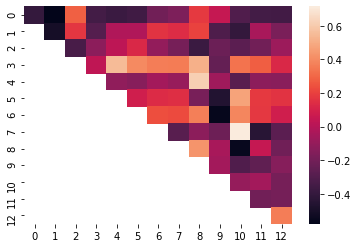

In [57]:
sns.heatmap(corr)